In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

In [2]:
df = pd.read_csv('./data/train_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income>50K      25000 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.9+ MB


In [44]:
string_columns = df.select_dtypes('object').keys()
df[string_columns] = df[string_columns].astype('category').apply(lambda x: x.cat.codes)
df['made_money'] = (df['capital.gain']> 0).astype(int)
df['loaded'] = (df['capital.gain'] == 99_999).astype(int)
df['full_time'] = (df['hours.per.week'] >= 40).astype(int)
df['fnlwgt'] = (df.fnlwgt - df.fnlwgt.mean()) / df.fnlwgt.std()
df['fnlwgt_squared'] = df['fnlwgt'] ** 2
df['edu_work_race'] = (df['education.num'] * df['workclass'].astype('category').cat.codes * df['race']).astype('category').cat.codes ** (1/3)
df['educated'] = (df['education.num'] > 8).astype(int)
df['edu_fulltime_sex_occupation'] = (df.educated * 10 + 1) * (df.full_time * 10 + 1) * (df.sex * 10 + 1) * df.occupation
df['edu_fulltime_sex_occupation'] = (df['edu_fulltime_sex_occupation'] - df['edu_fulltime_sex_occupation'].mean()) / df['edu_fulltime_sex_occupation'].std()
df = df.rename(columns={'income>50K': 'LABEL'})

LABEL = df.pop('LABEL')
df['LABEL'] = LABEL
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          25000 non-null  int64  
 1   workclass                    25000 non-null  int8   
 2   fnlwgt                       25000 non-null  float64
 3   education                    25000 non-null  int8   
 4   education.num                25000 non-null  int64  
 5   marital.status               25000 non-null  int8   
 6   occupation                   25000 non-null  int8   
 7   relationship                 25000 non-null  int8   
 8   race                         25000 non-null  int8   
 9   sex                          25000 non-null  int8   
 10  capital.gain                 25000 non-null  int64  
 11  capital.loss                 25000 non-null  int64  
 12  hours.per.week               25000 non-null  int64  
 13  native.country  

In [45]:
test_df = pd.read_csv('./data/test_final.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              23842 non-null  int64 
 1   age             23842 non-null  int64 
 2   workclass       23842 non-null  object
 3   fnlwgt          23842 non-null  int64 
 4   education       23842 non-null  object
 5   education.num   23842 non-null  int64 
 6   marital.status  23842 non-null  object
 7   occupation      23842 non-null  object
 8   relationship    23842 non-null  object
 9   race            23842 non-null  object
 10  sex             23842 non-null  object
 11  capital.gain    23842 non-null  int64 
 12  capital.loss    23842 non-null  int64 
 13  hours.per.week  23842 non-null  int64 
 14  native.country  23842 non-null  object
dtypes: int64(7), object(8)
memory usage: 2.7+ MB


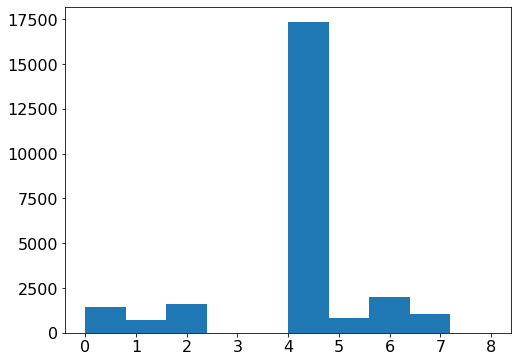

In [46]:
plt.figure(figsize=(8,6))
plt.hist(df.workclass)
plt.show()

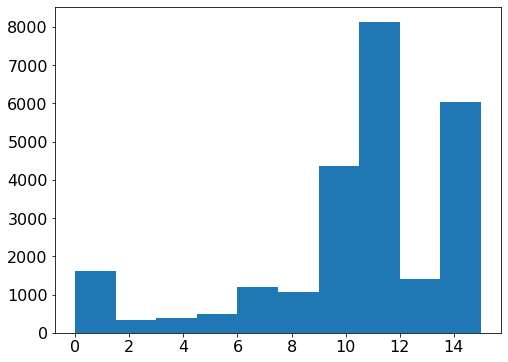

In [47]:
plt.figure(figsize=(8,6))
plt.hist(df.education)
plt.show()

In [48]:
print(np.std(df[df.LABEL == 0].fnlwgt ** 2))
print(np.std(df[df.LABEL == 1].fnlwgt ** 2))

3.171695906619158
2.1528684586457767


In [49]:
def plot_feature_with_label(feature_name):
    LABEL_0 = df[df.LABEL == 0][feature_name]
    LABEL_1 = df[df.LABEL == 1][feature_name]

    print(f"label 0 std: {LABEL_0.std()}, label 1 std: {LABEL_1.std()}")

    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(12,8))
    plt.hist(LABEL_0, bins=300, label=f'{feature_name} with label 0')
    plt.hist(LABEL_1, bins=300, label=f'{feature_name} with label 1')
    plt.axvline(LABEL_0.mean(), label=f'{feature_name} with Label 0 avg', c='black')
    plt.axvline(LABEL_1.mean(), label=f'{feature_name} with Label 1 avg', c='red')
    plt.legend()
    plt.show()

label 0 std: 1.1325936225627098, label 1 std: 0.7899634462149787


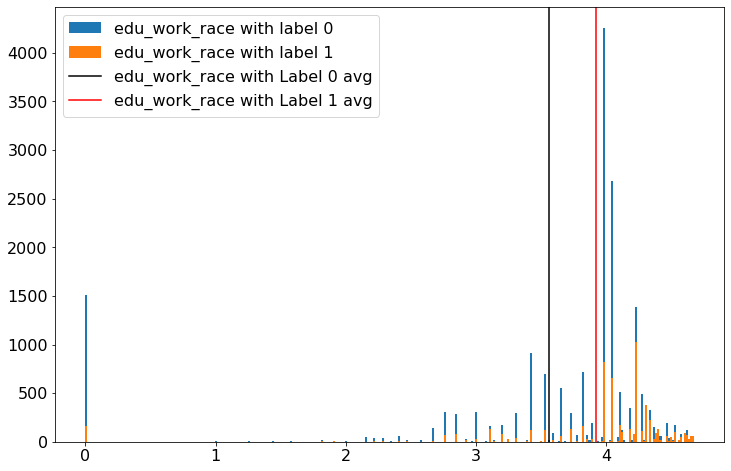

In [50]:
plot_feature_with_label('edu_work_race')

label 0 std: 0.45004926849919513, label 1 std: 0.28846900259900077


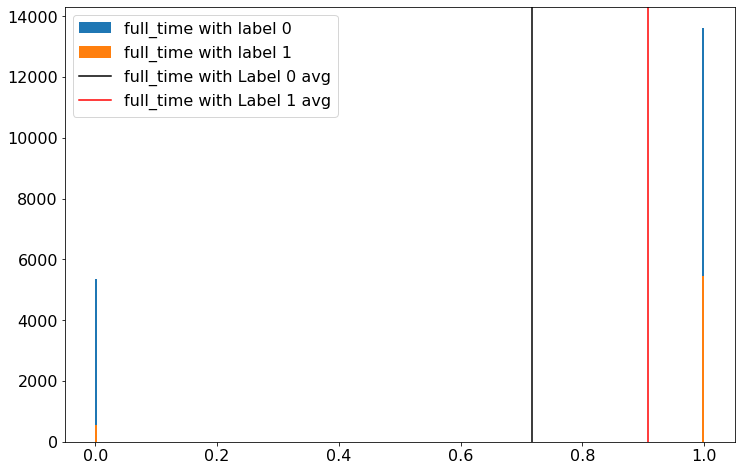

In [51]:
plot_feature_with_label('full_time')

label 0 std: 12.315227438098203, label 1 std: 11.291842181244359


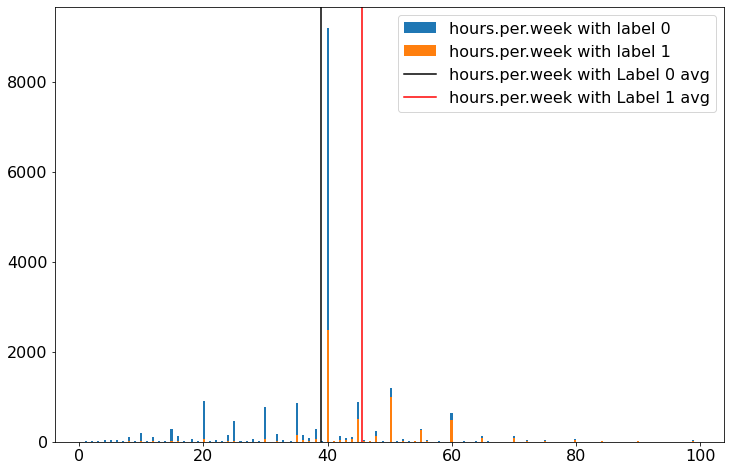

In [52]:
plot_feature_with_label('hours.per.week')

label 0 std: 0.20115541330244363, label 1 std: 0.4137718567736519


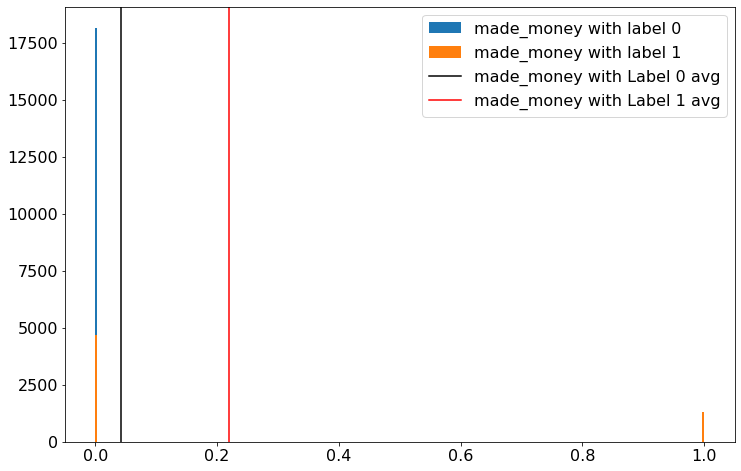

In [53]:
plot_feature_with_label('made_money')

label 0 std: 308.3660920364981, label 1 std: 593.9436308105543


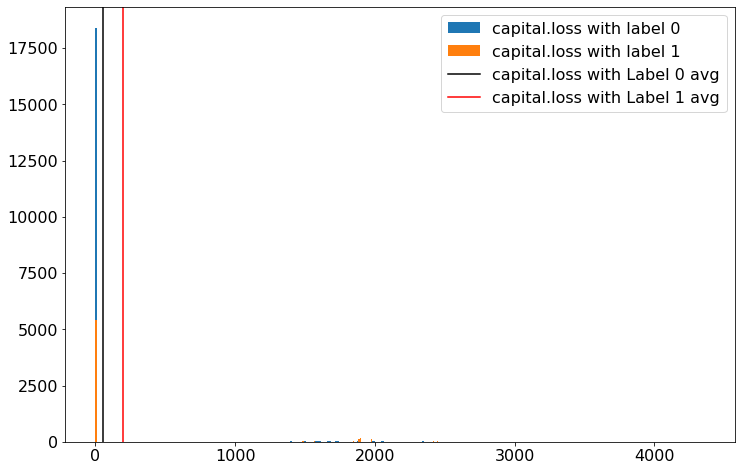

In [54]:
plot_feature_with_label('capital.loss')

label 0 std: 0.48738245406452096, label 1 std: 0.3573616199679473


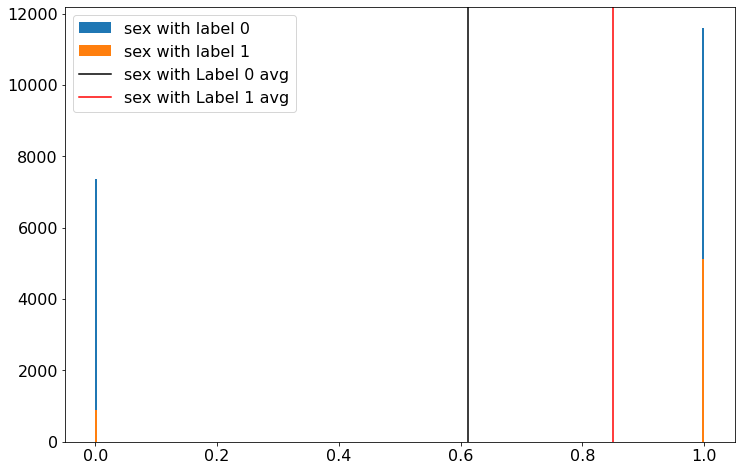

In [55]:
plot_feature_with_label('sex')

label 0 std: 0.884801646123491, label 1 std: 0.7329700515564477


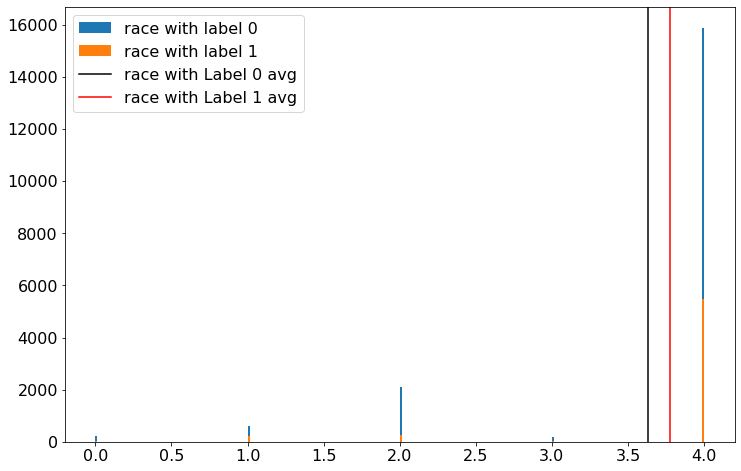

In [56]:
plot_feature_with_label('race')

label 0 std: 1.4879292020245052, label 1 std: 1.398529900894156


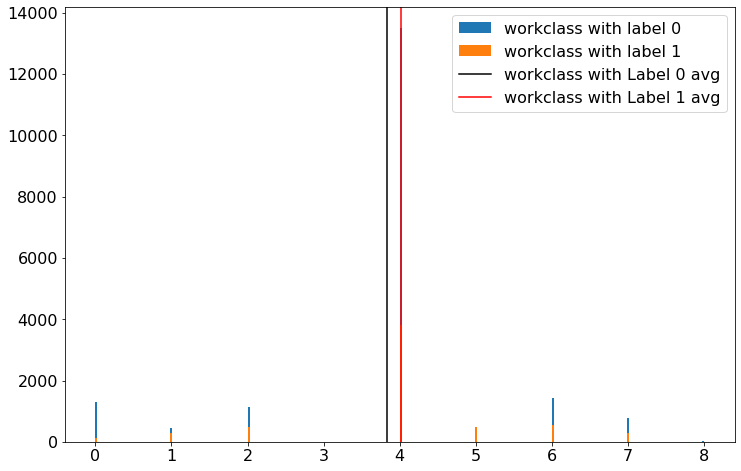

In [57]:
plot_feature_with_label('workclass')

label 0 std: 0.36921229745003736, label 1 std: 0.1712959822715792


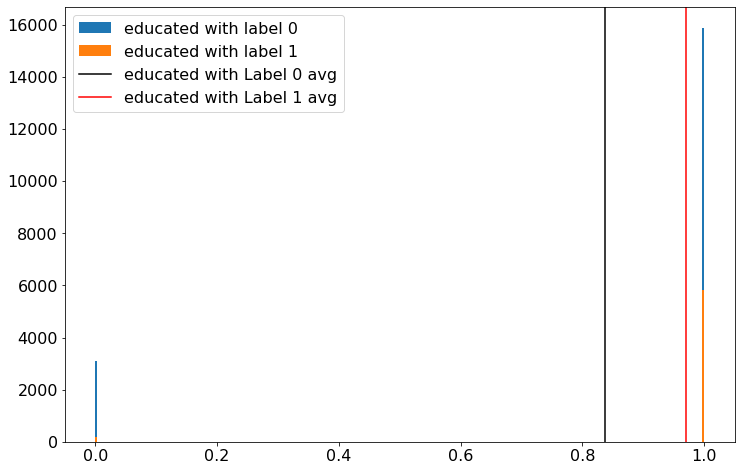

In [58]:
plot_feature_with_label('educated')

label 0 std: 4.238908693157228, label 1 std: 4.083518336888225


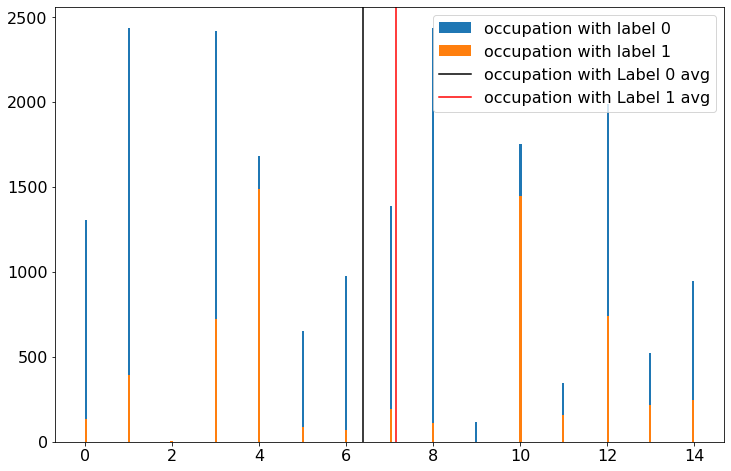

In [59]:
plot_feature_with_label('occupation')

label 0 std: 2.4368751098564916, label 1 std: 2.39537293539435


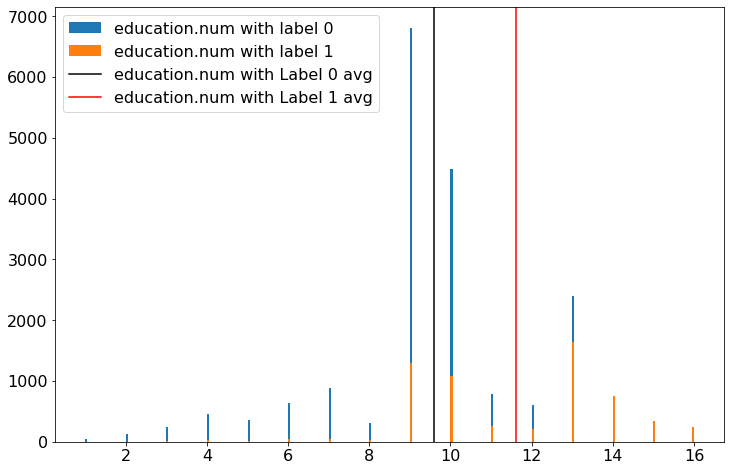

In [60]:
plot_feature_with_label('education.num')

<AxesSubplot:>

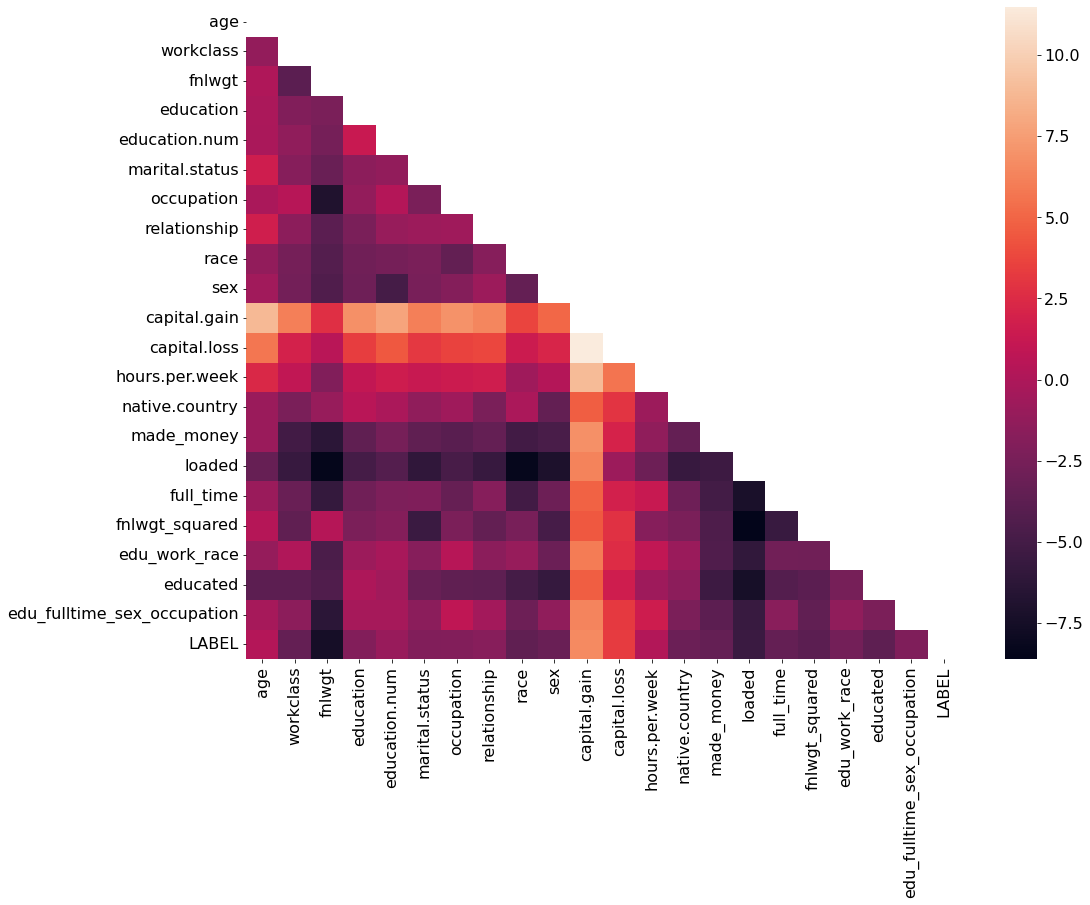

In [61]:
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(df.cov(), dtype=bool))
sns.heatmap(np.log(np.abs(df.cov())), mask=mask)

<AxesSubplot:>

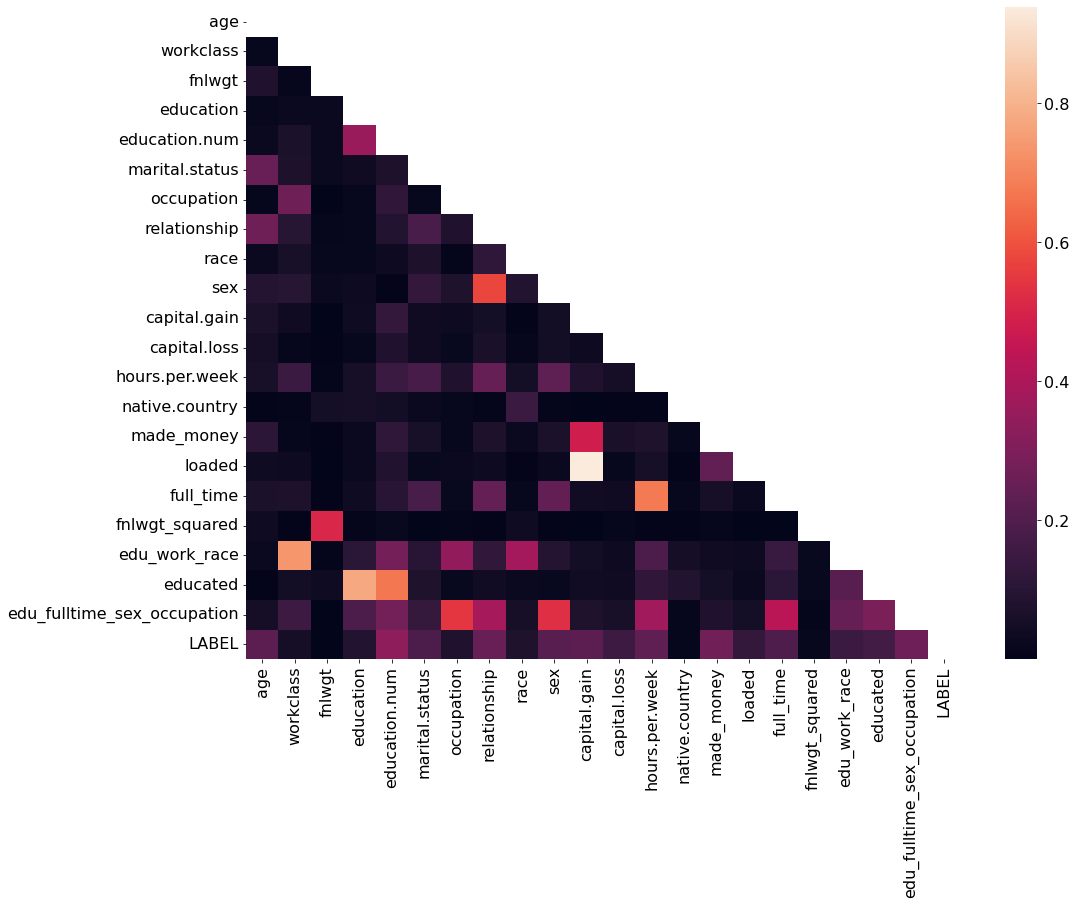

In [62]:
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(np.abs(df.corr()), mask=mask)